C:\Users\pheng\AppData\Local\Temp\ipykernel_22348\1147913540.py:43: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


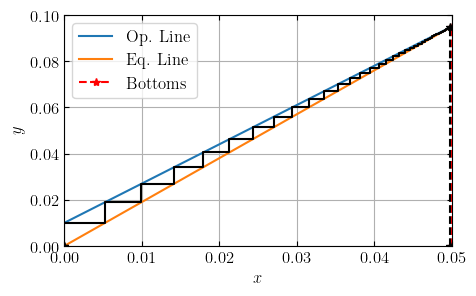

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

q = 0.95*0.20/0.05
q_min = 1.7
a = q_min
b = 0.20 - 0.05*q
K = 1.90

x = np.linspace(0,1,5)
x_0 = 0
x_N = 0.05

def op_line(x,a,b): return a*x + b

def stepping_x(x_0,x_N,a,b,K):
    
    x_n = x_0
    y_n = op_line(x_0,a,b)
    
    y_0 = op_line(x_0,K,0)
    
    x_eq = [x_0,x_0]
    y_eq = [y_0,y_n]
    
    for i in range(50):
        sol = root_scalar(lambda x: y_n-op_line(x,K,0),method='secant',x0=x_n)
        x_n = sol.root
        y_n = op_line(x_n,a,b)
        
        x_eq = np.hstack((x_eq,[x_n,x_n]))
        y_eq = np.hstack((y_eq,[op_line(x_n,K,0),op_line(x_n,a,b)]))
        
        if x_n > x_N:
            break
    
    return x_eq, y_eq

x_eq, y_eq = stepping_x(x_0,x_N,a,b,K)

# Plot results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,3)

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rc('font', **font)


plt.plot(x,op_line(x,a,b),label='Op. Line')
plt.plot(x,op_line(x,K,0),label='Eq. Line')
plt.plot([x_N,x_N],[0,op_line(x_N,K,0)],color='r',linestyle='--',marker='*',label='Bottoms')

plt.plot(x_eq[0:-1],y_eq[0:-1],color=[0,0,0])
plt.plot([x_eq[0],x_eq[0]],[0,y_eq[0]],color=[0,0,0],linestyle='--',marker='*')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-2]],color=[0,0,0],linestyle='--',marker='*')



plt.legend(loc='best')
plt.xlabel('$x$',fontfamily='Serif')
plt.ylabel('$y$',fontfamily='Serif')
plt.xlim([0,0.05])
plt.ylim([0,0.1])
plt.grid('on')
plt.tick_params(top='true',right='true',direction='in')

plt.show()


#fig.savefig('CHEN_3100_HW_2.png',dpi=600,bbox_inches='tight')
fig.savefig('CHEN_3100_HW_2_2.png',dpi=600,bbox_inches='tight')